In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d.csv')
btc_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_BTCUSDT_d.csv')
xrp_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_XRPUSDT_d.csv')

#Quick check
xrp_data.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
0,1.642720e+12,2022-01-21 00:00:00,XRP/USDT,0.7199,0.7217,0.7111,0.7202,6503834.0,4.662182e+06,7125
1,1.642640e+12,2022-01-20 00:00:00,XRP/USDT,0.7381,0.7622,0.7161,0.7199,205931050.0,1.531215e+08,218718
2,1.642550e+12,2022-01-19 00:00:00,XRP/USDT,0.7510,0.7533,0.7231,0.7381,190555142.0,1.407042e+08,214504
3,1.642460e+12,2022-01-18 00:00:00,XRP/USDT,0.7616,0.7686,0.7352,0.7509,188367099.0,1.411723e+08,209700
4,1.642380e+12,2022-01-17 00:00:00,XRP/USDT,0.7785,0.7805,0.7498,0.7617,181653025.0,1.385372e+08,205250


In [6]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_btc = btc_data.iloc[:,[1,6]]
db_xrp = xrp_data.iloc[:,[1,6]]

#Merging all three crypto data on the date
ETHxBTC = pd.merge(db_eth, db_btc, on='date', how='inner')
ETHxBTCxXRP = pd.merge(db_xrp,ETHxBTC, on='date', how='inner')

#Set the date as the index
ETHxBTCxXRP.set_index('date',inplace=True, drop=True)

cols = {'close':'XRP','close_x':'ETH','close_y':'BTC'}
ALL = ETHxBTCxXRP.rename(columns =cols, inplace= False)
ALL

,XRP,ETH,BTC
date,,,
2022-01-21 00:00:00,0.72020,2995.99,40710.99
2022-01-20 00:00:00,0.71990,3001.48,40680.91
2022-01-19 00:00:00,0.73810,3084.02,41660.01
2022-01-18 00:00:00,0.75090,3159.85,42352.12
2022-01-17 00:00:00,0.76170,3209.67,42201.62
...,...,...,...
2018-05-08 00:00:00,0.80667,748.99,9187.56
2018-05-07 00:00:00,0.82490,752.49,9365.00
2018-05-06 00:00:00,0.86483,794.30,9659.01


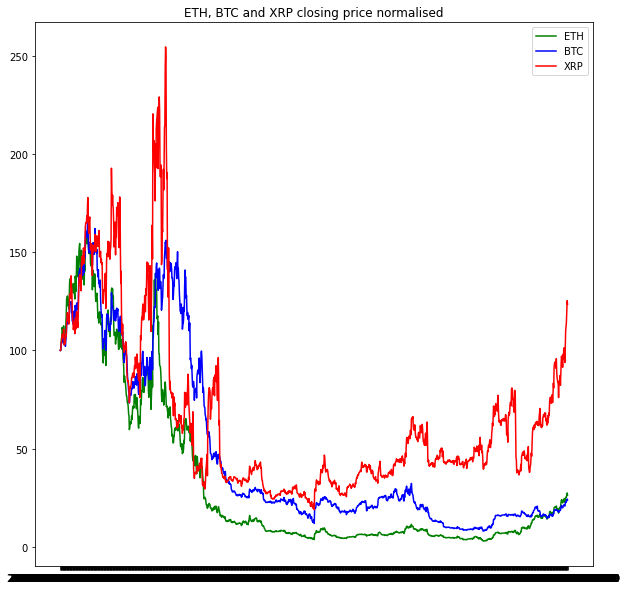

In [13]:
#Normalised data (Normalising the two graphs to see if the closing prices tracked eachother over time)
x1 = ALL['ETH']/ALL['ETH'].iloc[0]*100
x2 = ALL['BTC']/ALL['BTC'].iloc[0]*100
x3 = ALL['XRP']/ALL['XRP'].iloc[0]*100

plt.figure(figsize=(10,10))
plt.plot(x1,c='green',label='ETH')
plt.plot(x2,c='blue',label='BTC')
plt.plot(x3,c='red',label = 'XRP')
plt.title('ETH, BTC and XRP closing price normalised')
plt.style.use('tableau-colorblind10')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

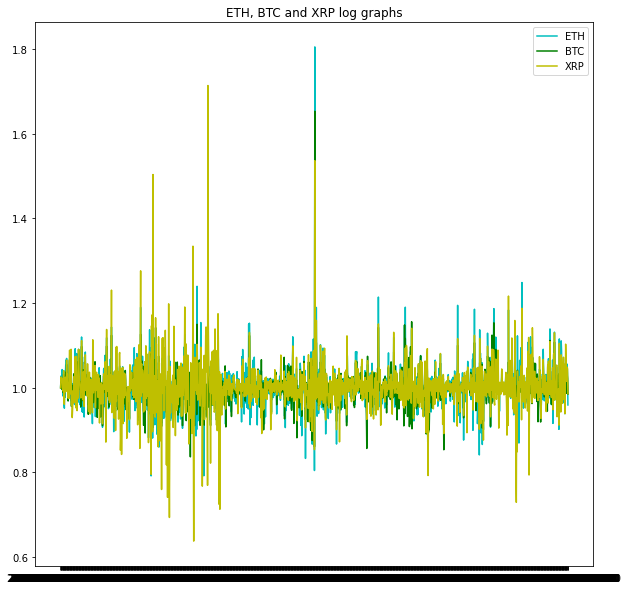

In [16]:
# Log graphs
log_eth = ALL['ETH']/ALL['ETH'].shift(1)
log_btc = ALL['BTC']/ALL['BTC'].shift(1)
log_xrp = ALL['XRP']/ALL['XRP'].shift(1)

plt.figure(figsize=(10,10))
plt.plot(log_eth,'-c',label='ETH')
plt.plot(log_btc,'-g',label='BTC')
plt.plot(log_xrp,'-y',label='XRP')
plt.title('ETH, BTC and XRP log graphs')
plt.legend()
plt.show


In [27]:
# Looking at a portfolio composed of the three stocks weighted accodingly:
weights = np.array([0.7,0.23,0.07])

# Calculating the simple returns
returns = (ALL/ALL.shift(1)) - 1

In [28]:
#The average daily rate of return in a percentage
print("Portfolio's average daily log returns = " + str(round(np.dot(returns.mean(),weights),4)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print("Portfolio's average annual log returns = " + str(round(np.dot(returns.mean()*250,weights),5)*100) + '%')

Portfolio's average daily log returns = 0.15%
Portfolio's average annual log returns = 36.888%
